In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [39]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'


In [24]:
final = pd.read_csv('final.csv', encoding = 'ANSI')
final

,시도,시군구,행정번호,년도,우울증환자수,평균연령,총인구수,스트레스인지율,고용률,코로나확진자수,1인당 정신건강예산(원),공공시설개수,우울증지수
0,서울특별시,서울종로구,1111000000,2018,14837,44.2,153065,34.2,59.60,0,5326,44,9.693268
1,서울특별시,서울중구,1114000000,2018,4352,44.6,125725,28.3,59.60,0,5326,42,3.461523
2,서울특별시,서울용산구,1117000000,2018,2370,43.6,228999,20.0,59.60,0,5326,53,1.034939
3,서울특별시,서울성동구,1120000000,2018,3657,42.0,308221,31.3,59.60,0,5326,50,1.186486
4,서울특별시,서울광진구,1121500000,2018,6917,41.4,355559,29.4,59.60,0,5326,47,1.945387
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,경상남도,경남함양군,4887000000,2022,283,54.5,37708,27.5,68.85,15896,6119,6,0.750504
1246,경상남도,경남거창군,4888000000,2022,794,50.4,60387,23.2,67.00,29267,6119,14,1.314853
1247,경상남도,경남합천군,4889000000,2022,185,57.8,42142,23.1,67.95,15704,6119,1,0.438992
1248,제주특별자치도,제주제주시,5011000000,2022,11503,42.5,493389,25.0,67.15,271444,8662,198,2.331426


In [25]:
cols = ['우울증환자수', '평균연령', '총인구수', '스트레스인지율', '고용률', '코로나확진자수', '1인당 정신건강예산(원)', '공공시설개수', '우울증지수']

In [26]:
final = final[cols]

In [27]:
# 독립변수와 종속변수 분리
X = final.drop('우울증지수', axis=1)
y = final['우울증지수']

robust_scaler = RobustScaler()

In [28]:
def ridge_poly_regression(num) :
    X_train, X_test , y_train , y_test = train_test_split(X,y, test_size = 0.3, random_state=123)  
    X_train_robust = robust_scaler.fit_transform(X_train)
    X_test_robust = robust_scaler.fit_transform(X_test)
    
    poly = PolynomialFeatures(degree=num)
    X_train_poly = poly.fit_transform(X_train_robust) 
    X_test_poly = poly.transform(X_test_robust) 

    for a in [0,0.1,1] :
       
        # 릿지 회귀 모델
        model = Ridge(alpha=a)
        model.fit(X_train_poly, y_train) 

        # 훈련된 모델로 예측
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)

        # 모델 평가 (RSME)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

        # 모델 평가 (R^2)
        train_R = r2_score(y_train, y_train_pred)
        test_R = r2_score(y_test, y_test_pred)
        
        # 회귀식의 계수(coefficients)와 절편(intercept) 확인
        coefficients = model.coef_  
        intercept = model.intercept_
    
        #print(f'계수 : {coefficients}')
        #print(f'절편 : {intercept}')
        print(f'규제가 {a}일 때 RMSE(train): {train_rmse}')
        print(f'규제가 {a}일 때 RMSE(test): {test_rmse}')
        print(f'규제가 {a}일 때 R^2(train) : {train_R}')
        print(f'규제가 {a}일 때 R^2(test) : {test_R}')
        print()

    return
ridge_poly_regression(2)

규제가 0일 때 RMSE(train): 0.3639739647225781
규제가 0일 때 RMSE(test): 0.8225346314604975
규제가 0일 때 R^2(train) : 0.9144586773643438
규제가 0일 때 R^2(test) : 0.47471865778347566

규제가 0.1일 때 RMSE(train): 0.36404808841657393
규제가 0.1일 때 RMSE(test): 0.8303792936418043
규제가 0.1일 때 R^2(train) : 0.9144238326497397
규제가 0.1일 때 R^2(test) : 0.46465147219021063

규제가 1일 때 RMSE(train): 0.3689758846386463
규제가 1일 때 RMSE(test): 0.8169043931618251
규제가 1일 때 R^2(train) : 0.9120914154216286
규제가 1일 때 R^2(test) : 0.4818851335381793



In [29]:
def ridge_cross_poly_regression(num) :
    poly = PolynomialFeatures(degree=num)
    X_robust = robust_scaler.fit_transform(X)
    X_poly = poly.fit_transform(X_robust)    
    
    for a in [0,0.1,1] :

        model = Ridge(alpha=a)

        # rmse
        cv_result_rmse = cross_val_score(model, X_poly, y, cv=10,
                                        scoring='neg_mean_squared_error')
        cv_rmse = np.sqrt(-cv_result_rmse) # 음수의 평균 제곱 오차를 양수로 변환
        avg_cv_rmse = np.mean(cv_rmse)
        std_cv_rmse = np.std(cv_rmse)

        # R^2
        cv_result_R = cross_val_score(model, X_poly, y, cv=10,
                                        scoring='r2')
        avg_cv_R = np.mean(cv_result_R)

        print(f'규제가 {a}일 때 교차검증 RMSE: {cv_rmse}')
        print(f'규제가 {a}일 때 교차검증 평균 RMSE: {avg_cv_rmse}')
        print(f'교차검증 표준편차 RMSE: {std_cv_rmse}')
        print(f'규제가 {a}일 때 교차검증 R^2: {cv_result_R}')
        print(f'규제가 {a}일 때 교차검증 평균 R^2: {avg_cv_R}')

        # 교차검증 예측값 생성
        y_pred_cv = cross_val_predict(model, X_poly, y, cv=10)

        # 교차검증 RMSE 및 R^2 계산
        cv_pred_rmse = np.sqrt(mean_squared_error(y, y_pred_cv))
        cv_pred_r2 = r2_score(y, y_pred_cv)

        print(f'교차검증 예측값 RMSE: {cv_pred_rmse}')
        print(f'교차검증 예측값 R^2: {cv_pred_r2}')

    return
ridge_cross_poly_regression(2)

규제가 0일 때 교차검증 RMSE: [0.41954551 0.33851676 0.42141475 0.30880424 0.4176251  0.32373186
 0.41148196 0.32016553 1.1425846  0.39862262]
규제가 0일 때 교차검증 평균 RMSE: 0.4502492936946199
교차검증 표준편차 RMSE: 0.23489448723595632
규제가 0일 때 교차검증 R^2: [0.91031101 0.825606   0.89664605 0.85755535 0.88964104 0.84948433
 0.90119776 0.87140622 0.31456968 0.81594376]
규제가 0일 때 교차검증 평균 R^2: 0.8132361203845109
교차검증 예측값 RMSE: 0.5078384059977612
교차검증 예측값 R^2: 0.825172383154368
규제가 0.1일 때 교차검증 RMSE: [0.41994909 0.3388111  0.41622802 0.30998955 0.41247972 0.3251529
 0.41100289 0.32196106 1.14131157 0.39906328]
규제가 0.1일 때 교차검증 평균 RMSE: 0.44959491766975407
교차검증 표준편차 RMSE: 0.23439782650402638
규제가 0.1일 때 교차검증 R^2: [0.91013838 0.8253026  0.89917453 0.85645974 0.89234366 0.84816003
 0.90142769 0.86995983 0.3160962  0.8155366 ]
규제가 0.1일 때 교차검증 평균 R^2: 0.8134599268789682
교차검증 예측값 RMSE: 0.5070285308188135
교차검증 예측값 R^2: 0.8257295511300686
규제가 1일 때 교차검증 RMSE: [0.42732463 0.33813131 0.41789662 0.31029816 0.41677946 0.32512226
 0.4

In [33]:
def ridge_cross_poly_regression(num) :

    poly = PolynomialFeatures(degree=num)
    X_robust = robust_scaler.fit_transform(X)
    X_poly = poly.fit_transform(X_robust)    
    

    model = Ridge(alpha=1)
    model.fit(X_poly, y)
    coefficients = model.coef_  
    intercept = model.intercept_
    
    print(f'계수 : {coefficients}')
    print(f'절편 : {intercept}')

    # rmse
    cv_result_rmse = cross_val_score(model, X_poly, y, cv=10,
                                    scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_result_rmse) # 음수의 평균 제곱 오차를 양수로 변환
    avg_cv_rmse = np.mean(cv_rmse)
    std_cv_rmse = np.std(cv_rmse)

    # R^2
    cv_result_R = cross_val_score(model, X_poly, y, cv=10,
                                    scoring='r2')
    avg_cv_R = np.mean(cv_result_R)


    print(f'교차검증 RMSE: {cv_rmse}')
    print(f'교차검증 평균 RMSE: {avg_cv_rmse}')
    print(f'교차검증 표준편차 RMSE: {std_cv_rmse}')
    print(f'교차검증 R^2: {cv_result_R}')
    print(f'교차검증 평균 R^2: {avg_cv_R}')

    # 교차검증 예측값 생성
    y_pred_cv = cross_val_predict(model, X_poly, y, cv=10)

    # 교차검증 RMSE 및 R^2 계산
    cv_pred_rmse = np.sqrt(mean_squared_error(y, y_pred_cv))
    cv_pred_r2 = r2_score(y, y_pred_cv)

    print(f'교차검증 예측값과실제값 RMSE: {cv_pred_rmse}')
    print(f'교차검증 예측값과실제값 R^2: {cv_pred_r2}')

    return
ridge_cross_poly_regression(2)

'''
절편 : 1.5737662782586392
교차검증 RMSE: [0.42732463 0.33813131 0.41789662 0.31029816 0.41677946 0.32512226
 0.41154171 0.32760505 1.06879929 0.39813015]
교차검증 평균 RMSE: 0.444162863209011
교차검증 표준편차 RMSE: 0.2126019625959802
교차검증 R^2: [0.9069542  0.82600293 0.89836452 0.85617379 0.89008751 0.84818865
 0.90116907 0.86536065 0.40023808 0.81639825]
교차검증 평균 R^2: 0.8208937646929286
교차검증 예측값과실제값 RMSE: 0.4924228300492262
교차검증 예측값과실제값 R^2: 0.8356251712807471
'''

계수 : [ 0.00000000e+00  3.18131646e+00  2.85641733e-01 -2.33367516e+00
  1.30503813e-02 -1.34053231e-01 -4.35889592e-03 -2.25555994e-02
  1.44543898e-01  5.60903030e-02  1.24854232e+00 -1.76819103e+00
  8.45389146e-02  4.13917766e-01 -2.09631828e-05 -2.93560639e-01
  3.31437526e-01 -1.48841132e-01 -1.20563808e+00 -2.95504196e-02
 -5.21253055e-02 -8.19424652e-04  1.36971572e-01  8.39292964e-03
  1.46742262e+00 -1.40293248e-01  3.84363132e-01 -4.03411828e-05
  4.73194539e-01 -4.80145229e-01  9.53692632e-03  3.52233512e-02
  5.44325320e-05  1.30225696e-02  1.30976199e-02  1.09927775e-01
 -1.58877093e-03  2.53669029e-02 -8.49179208e-02  2.93366709e-05
  8.22376291e-04 -9.23748444e-05  8.49020812e-03 -9.98084718e-02
  1.34126835e-02]
절편 : 1.5737662782586392
교차검증 RMSE: [0.42732463 0.33813131 0.41789662 0.31029816 0.41677946 0.32512226
 0.41154171 0.32760505 1.06879929 0.39813015]
교차검증 평균 RMSE: 0.444162863209011
교차검증 표준편차 RMSE: 0.2126019625959802
교차검증 R^2: [0.9069542  0.82600293 0.89836452 0.8

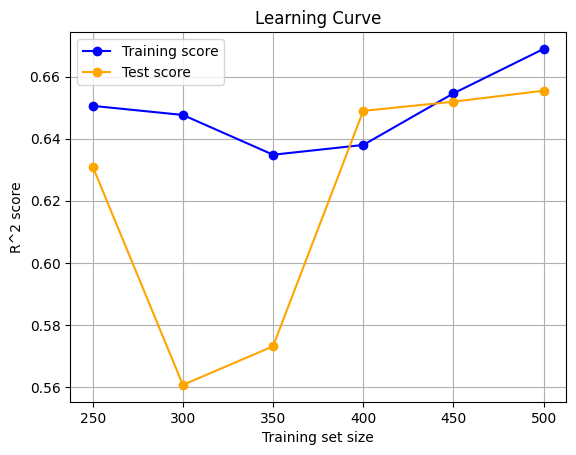

In [19]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline

def plot_learning_curve(estimator, X, y, cv, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='r2')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="orange", label="Test score")
    plt.title("Learning Curve")
    plt.xlabel("Training set size")
    plt.ylabel("R^2 score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# 데이터셋을 준비합니다 (X와 y는 이미 정의되어 있다고 가정합니다).
# robust_scaler와 PolynomialFeatures를 포함한 파이프라인을 생성합니다.
pipeline = make_pipeline(RobustScaler(), PolynomialFeatures(degree=2), Ridge(alpha=1))

# 교차 검증을 위한 k-fold 설정
cv = 5

# 학습 곡선을 그리기 위한 훈련 세트 크기 설정
train_sizes = [250, 300, 350, 400, 450, 500]

# 학습 곡선을 그리는 함수를 호출합니다.
plot_learning_curve(pipeline, X, y, cv, train_sizes)


In [ ]:
0.1, 0.5, 1.0

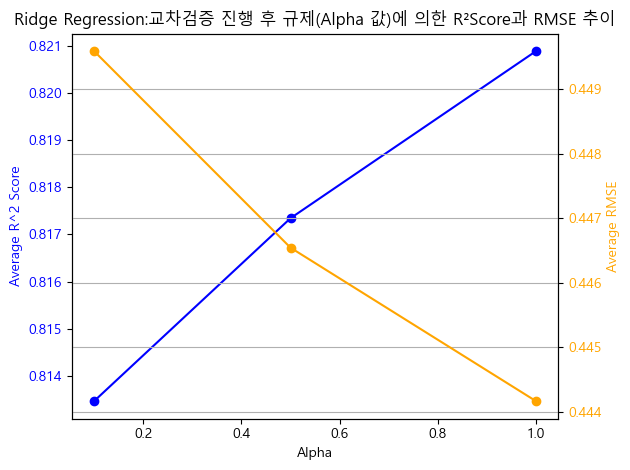

In [40]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# 데이터 전처리 및 다항 특성 변환
poly = PolynomialFeatures(degree=2)
X_robust = robust_scaler.fit_transform(X)
X_poly = poly.fit_transform(X_robust)

# alpha 값 리스트
alpha_values = [0.1, 0.5, 1]
avg_r2_scores = []
avg_rmse_scores = []

# 각 alpha 값에 대해 교차 검증을 수행하고 R^2 점수와 RMSE의 평균을 계산
for alpha in alpha_values:
    model = Ridge(alpha=alpha)
    
    # R^2 점수 계산
    r2_scores = cross_val_score(model, X_poly, y, cv=10, scoring='r2')
    avg_r2_scores.append(np.mean(r2_scores))
    
    # RMSE 계산
    mse_scores = cross_val_score(model, X_poly, y, cv=10, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-mse_scores)
    avg_rmse_scores.append(np.mean(rmse_scores))

# 결과 그래프로 표시
fig, ax1 = plt.subplots()

ax1.set_xlabel('Alpha')
ax1.set_ylabel('Average R^2 Score', color='blue')
ax1.plot(alpha_values, avg_r2_scores, marker='o', color='blue', label='Average R^2')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  # 동일한 x축을 공유하는 새로운 y축 생성
ax2.set_ylabel('Average RMSE', color='orange')
ax2.plot(alpha_values, avg_rmse_scores, marker='o', color='orange', label='Average RMSE')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Ridge Regression:교차검증 진행 후 규제(Alpha 값)에 의한 R²Score과 RMSE 추이')
fig.tight_layout()
plt.grid(True)
plt.show()
